**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

**STARR/MPRA**

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.ranknorm.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.ranknorm.aggregate.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.ranknorm.overlap.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.ranknorm.overlap.starrmpra.tsv 


In [6]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc_score", 
        txt_folder, 
        "summary"
    )
    txt_fname = "region.coverage.ranknorm.overlap.starrmpra.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_ranknorm_starrmpra_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.34155069,0.7425860,0.4848754
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460


In [7]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc_score", 
        txt_folder, 
        "summary"
    )
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_fcc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     12

$fcc_astarr_macs_input_union
[1] 639718     12



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


**CRISPRi-HCRFF**

In [8]:
txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")

vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

region.coverage.score.filtered.merge.tsv 
region.coverage.score.filtered.target.tsv 
region.coverage.score.total.merge.tsv 
region.coverage.score.total.target.tsv 


In [9]:
txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"

lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "region.coverage.score.filtered.merge.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_chcrff_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 925   9

$fcc_astarr_macs_input_union
[1] 1330    9



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11,4092109,4092511,chr11:4092109-4092511,-0.12943640,0.00000000,-0.2425928,320,HBE1:320|HBG1:320|HBG2:320|HBS1L:320|MYB:320
chr11,4094223,4095304,chr11:4094223-4095304,-0.04849565,0.09460382,-0.2516657,1030,HBE1:1030|HBG1:1030|HBG2:1030|HBS1L:1030|MYB:1030
chr11,4144721,4147004,chr11:4144721-4147004,-0.07024901,0.00000000,-0.1515237,1185,HBE1:1185|HBG1:1185|HBG2:1185|HBS1L:1185|MYB:1185


**CRISPRi-Growth**

In [10]:
txt_assay = "CRISPRi_Growth_K562_Gersbach_JinWoo"
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")

vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

region.coverage.score.tsv 


In [11]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_assay = "CRISPRi_Growth_K562_Gersbach_JinWoo"
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "region.coverage.score.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_cgrowth_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 72743    11

$fcc_astarr_macs_input_union
[1] 80288    11



Chrom,ChromStart,ChromEnd,Region,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,605104,605675,chr1:605104-605675,0.0904152,-0.2365345,3.171240,-0.774100,10,-0.3442168,1.8289430
chr1,778233,779389,chr1:778233-779389,0.1162065,0.0869985,0.666834,-0.405530,10,-0.2424447,0.3553073
chr1,817031,817525,chr1:817031-817525,-0.2753540,-0.4340535,1.049030,-0.928019,6,-0.5402308,1.0490300


**ENCODE-E2G benchmark**

In [12]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
txt_fname  = "region.annotation.encode_e2g*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.regulated.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.score.merge.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.score.target.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.tsv 


In [13]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "region.annotation.encode_e2g_benchmark.score.merge.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_e2g_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3035    9

$fcc_astarr_macs_input_union
[1] 3169    9



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,3774056,3776283,chr1:3774056-3776283,-5.9011920,0.0000000,-7.667223,3,CEP104:3|LRRC47:3|SMIM1:3
chr1,3803955,3806146,chr1:3803955-3806146,0.3625040,0.5876462,0.000000,2,LRRC47:2|SMIM1:2
chr1,4126841,4128109,chr1:4126841-4128109,0.5496118,0.5496118,0.000000,1,SMIM1:1


**ATAC**

In [14]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.atac.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.atac.tsv 


In [15]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
    txt_fname  = "region.coverage.score.atac.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_atac_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     11

$fcc_astarr_macs_input_union
[1] 246852     11



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Score_Quantile,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,3.940038,ASTARR Input TPM,Q3,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2.841707,ASTARR Input TPM,Q2,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,3.830812,ASTARR Input TPM,Q3,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC


**Known or tested CREs**

In [16]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname  = "region.annotation.genome_cres.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_cres_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 27 12

$fcc_astarr_macs_input_union
[1] 27 12



Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5275455,5276164,chr11:5275455-5276164,chr11:5275456-5276164,genome_cres,LCR HS1,enhancer,HBE1,locus control region HS1,NA,known CREs
chr11,5280584,5281266,chr11:5280584-5281266,chr11:5280585-5281266,genome_cres,LCR HS2,enhancer,HBE1,locus control region HS2,NA,known CREs


## Order and range of regions

**Select where to plot**

In [17]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    dat = lst_dat_region_annot_cres_import[[txt_folder]]
    dat = dat %>% dplyr::filter(Label ==  "GATA1 promoter")
    return(dat)
})

### assign and show
lst_dat_region_selected = lst

dat = bind_rows(lst, .id = "Folder")
fun_display_table(dat)

Folder,Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
fcc_astarr_macs_input_overlap,chrX,48785793,48786722,chrX:48785793-48786722,chrX:48785794-48786722,genome_cres,GATA1 promoter,promoter,GATA1,GATA1 promoter,"Fulco et al., 2016; Reilly et al., 2021",known CREs
fcc_astarr_macs_input_union,chrX,48785773,48786737,chrX:48785773-48786737,chrX:48785794-48786722,genome_cres,GATA1 promoter,promoter,GATA1,GATA1 promoter,"Fulco et al., 2016; Reilly et al., 2021",known CREs


**Get the index of selected regions**

In [18]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of regions
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region_total = dat$Region

    ### get the selected regions
    dat = lst_dat_region_selected[[txt_folder]]
    vec_txt_region_select = dat$Region
    
    ### get the index of selected regions
    vec = which(vec_txt_region_total %in% vec_txt_region_select)
    vec_num_index = vec
    return(vec_num_index)
})

### assign and show
lst_vec_num_index = lst
print(lst)

$fcc_astarr_macs_input_overlap
[1] 227

$fcc_astarr_macs_input_union
[1] 206



**Determine the region ranges to plot**

In [19]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region_total = dat$Region

    ###
    dat = lst_dat_region_selected[[txt_folder]]
    vec_txt_region_select = dat$Region
    
    ###
    vec = which(vec_txt_region_total %in% vec_txt_region_select)
    #num_min = min(vec)
    num_max = max(vec)
    vec_num_range = c(1, num_max + 5)
    return(vec_num_range)
})

### assign and show
lst_vec_num_range = lst

print(lst)

$fcc_astarr_macs_input_overlap
[1]   1 232

$fcc_astarr_macs_input_union
[1]   1 211



**Using the region ranges to get the regions to plot**

In [20]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of regions
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>% 
        dplyr::arrange(desc(Mean)) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region) %>% 
        dplyr::distinct()
    dat_region = dat
    
    ### get the region range
    vec_num_range = lst_vec_num_range[[txt_folder]]
    num_min = min(vec_num_range)
    num_max = max(vec_num_range)

    ### filter the region by range
    dat = dat_region
    dat = dat[num_min:num_max,]
    return(dat)
})

### assign and show
lst_dat_region = lst

res = lapply(lst, dim)
print(res)

vec = lst[[1]]
fun_display_table(head(vec, 3))

$fcc_astarr_macs_input_overlap
[1] 232   4

$fcc_astarr_macs_input_union
[1] 211   4



Chrom,ChromStart,ChromEnd,Region
chrX,48573742,48575170,chrX:48573742-48575170
chr11,34234056,34234496,chr11:34234056-34234496
chrX,49039753,49040214,chrX:49039753-49040214


**Get the sorted regions**

In [21]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = dat$Region

    ### get the region range
    vec_num_range = lst_vec_num_range[[txt_folder]]
    num_min = min(vec_num_range)
    num_max = max(vec_num_range)

    ### filter the region by range
    vec = vec_txt_region
    vec = vec[num_min:num_max]
    return(vec)
})

### assign and show
lst_vec_txt_region_sorted = lst

res = lapply(lst, length)
print(res)

vec = lst[[1]]
head(vec, 3)

$fcc_astarr_macs_input_overlap
[1] 232

$fcc_astarr_macs_input_union
[1] 211



[1] "chrX:48573742-48575170"  "chr11:34234056-34234496"
[3] "chrX:49039753-49040214"

## Plotting style

```
theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "plain", size = 17)
    #axis.title.y = element_text(size = 15)
)
```

In [22]:
THEME_TEXT = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    #axis.title.x = element_text(size = 20),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

## Prepare STARR/MPRA

In [23]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "LMPRA", "TMPRA")
    vec_txt_assay = rev(vec_txt_assay)

    ### set the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### renew factor level based on the order
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>%
        dplyr::filter(Region %in% vec_txt_region) %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_score_starrmpra_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 928   8

$fcc_astarr_macs_input_union
[1] 844   8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460
chr11,4619533,4619914,chr11:4619533-4619914,ASTARR,0.65633192,0.8742586,0.7932977


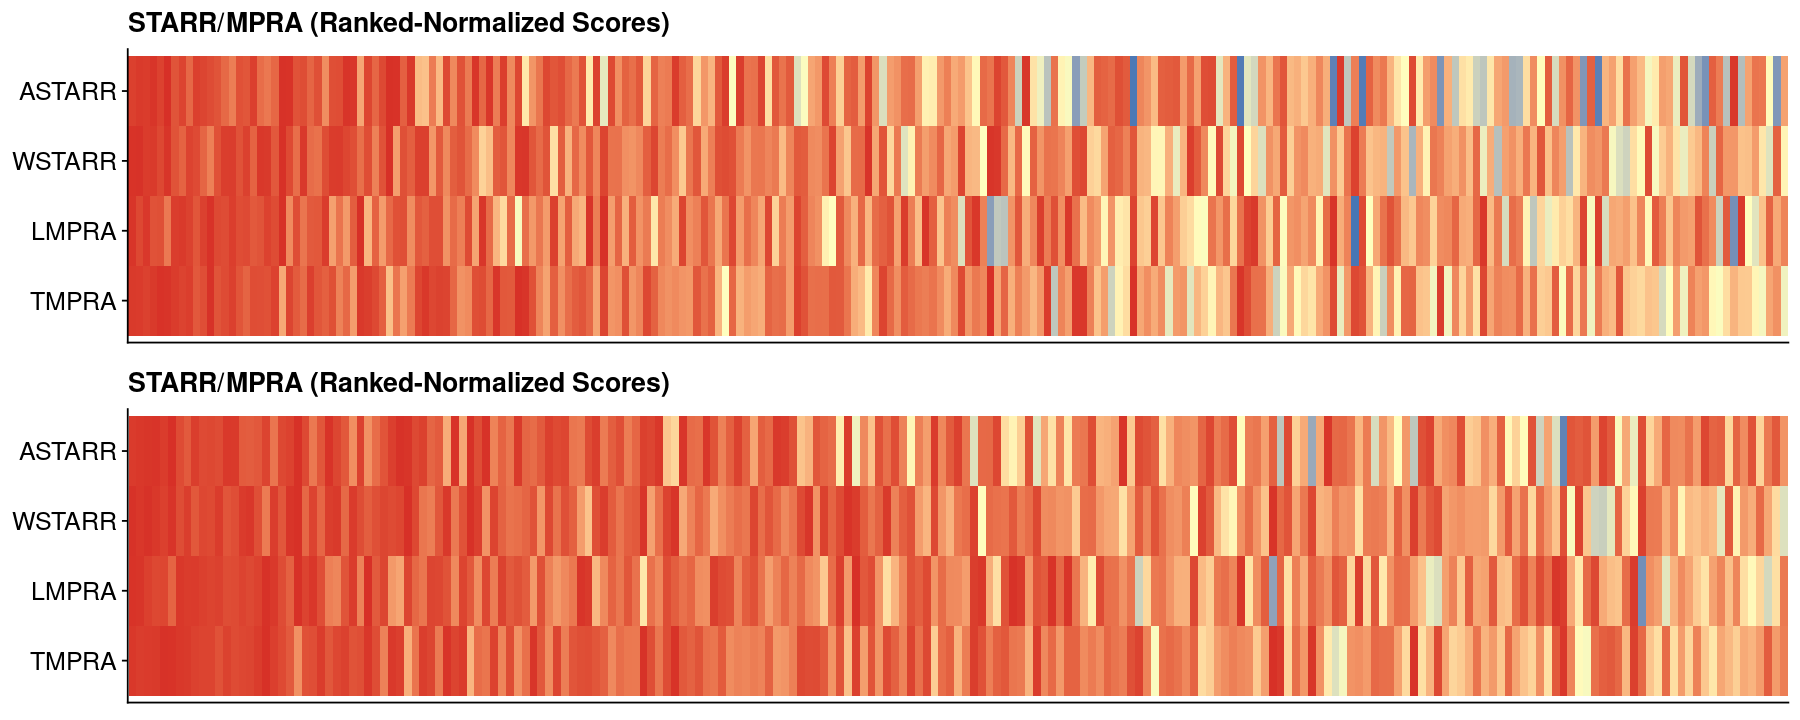

In [24]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5,
    limits   = c(0, 1), # force the data range
    oob      = scales::squish 
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_starrmpra_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        labs(title = "STARR/MPRA (Ranked-Normalized Scores)") +
        theme_cowplot() + 
        theme_text +
        theme_fill +
        theme_legend
    return(gpt)
})

### assign and show
lst_gpt_region_score_starrmpra = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Prepare CRISPRi-HCRFF

In [25]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of regions
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score = lst_dat_region_score_chcrff_import[[txt_folder]]
    dat_region       = lst_dat_region[[txt_folder]]
    
    ### get score columns
    dat = dat_region_score %>% 
        dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
        dplyr::right_join(dat_region, by = "Region")

    ### arrange the table
    dat = dat %>% 
        tidyr::gather(Group, Score, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Score) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_chcrff_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 464   6

$fcc_astarr_macs_input_union
[1] 422   6



Chrom,ChromStart,ChromEnd,Region,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
chr11,4607720,4608631,chr11:4607720-4608631,Mean_Pos,0.00000000
chr11,4890167,4890599,chr11:4890167-4890599,Mean_Pos,0.03717376
chr11,4891786,4892668,chr11:4891786-4892668,Mean_Pos,0.00000000


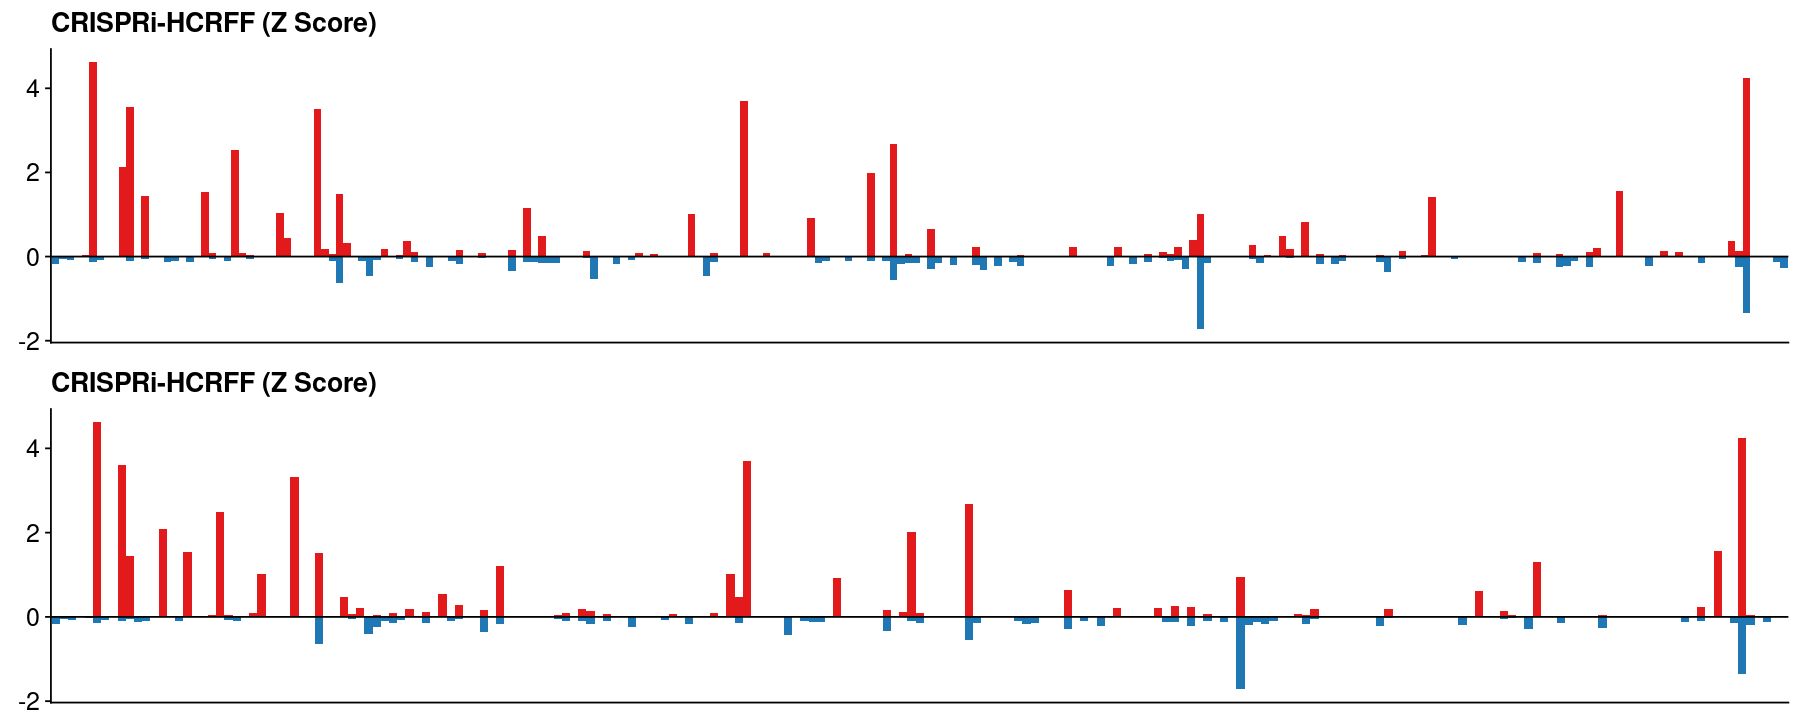

In [26]:
### set plot style
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4"
    )
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_chcrff_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
        geom_col(width=1, position="identity") + 
        geom_hline(yintercept = 0) +
        labs(title = "CRISPRi-HCRFF (Z Score)") +
        theme_cowplot() + 
        theme_text +
        theme_fill +
        theme_legend    
})

### assign and show
lst_gpt_region_score_chcrff = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Prepare CRISPRi-Growth

In [27]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score = lst_dat_region_score_cgrowth_import[[txt_folder]]
    dat_region       = lst_dat_region[[txt_folder]]
    
    ### get score column
    dat = dat_region_score %>% 
        dplyr::select(Region, Mean) %>%
        dplyr::right_join(dat_region, by = "Region")

    ### arrange the table
    dat = dat %>% 
        tidyr::gather(Group, Score, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Score) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_cgrowth_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 232   6

$fcc_astarr_macs_input_union
[1] 211   6



Chrom,ChromStart,ChromEnd,Region,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
chr11,4607720,4608631,chr11:4607720-4608631,Mean,0.0005555
chr11,4890167,4890599,chr11:4890167-4890599,Mean,-0.0729509
chr11,4891786,4892668,chr11:4891786-4892668,Mean,-0.1836694


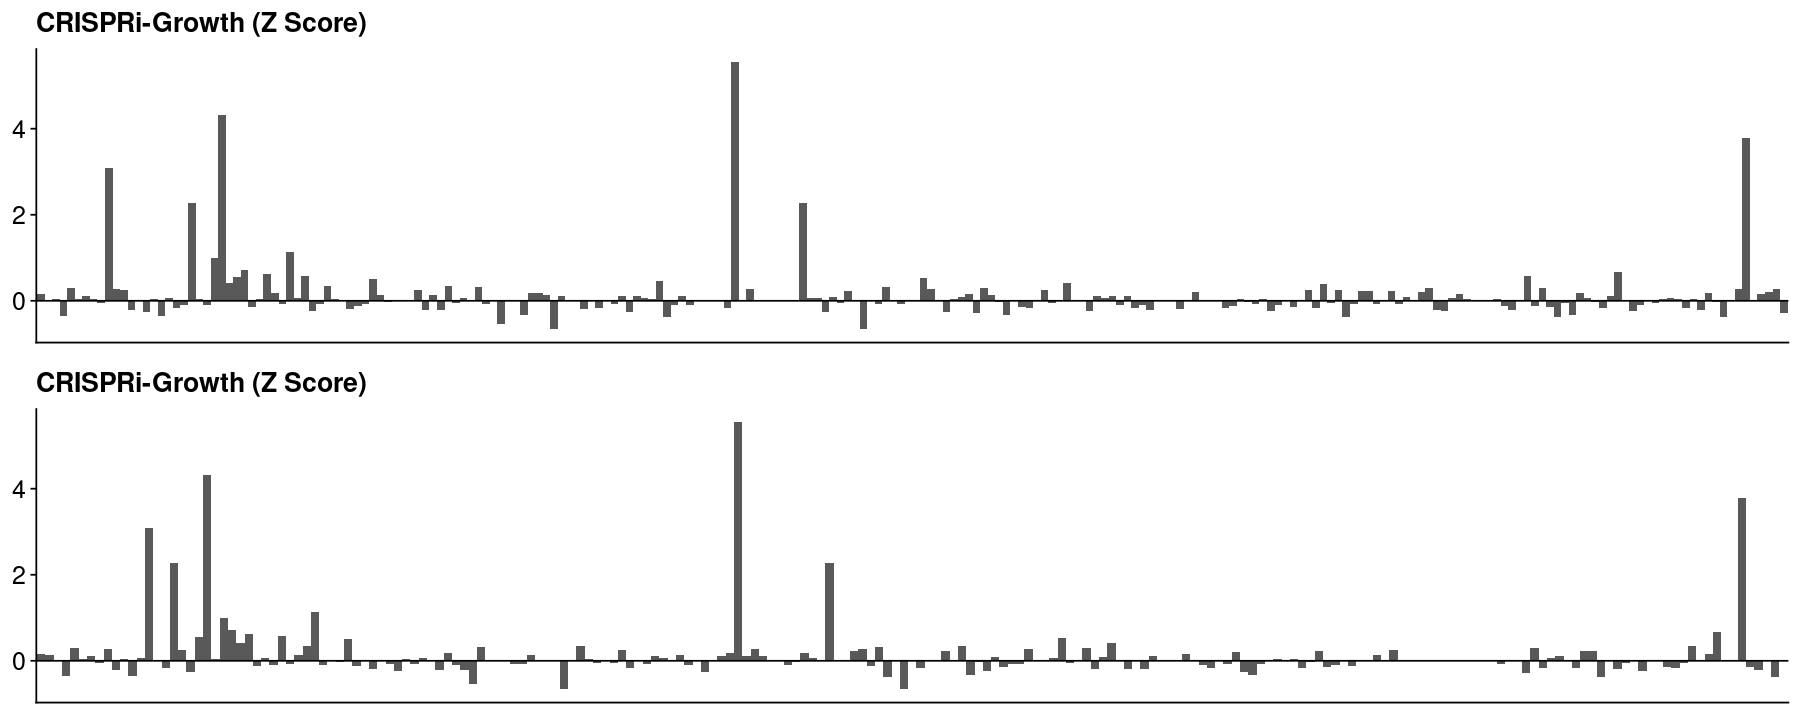

In [28]:
### set plot style
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate plot
lst = lst_dat_region_score_cgrowth_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score)) + 
        geom_col(width=1, position="identity") +
        geom_hline(yintercept = 0) +
        labs(title = "CRISPRi-Growth (Z Score)") +
        theme_cowplot() + 
        theme_text +
        theme_legend
    return(gpt)    
})

### assign and show
lst_gpt_region_score_cgrowth = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Prepare ENCODE-E2G Benchmark

In [29]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score = lst_dat_region_score_e2g_import[[txt_folder]]
    dat_region       = lst_dat_region[[txt_folder]]
    
    ### get score columns
    dat = dat_region_score %>% 
        dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
        dplyr::right_join(dat_region, by = "Region")

    ### arrange the table
    dat = dat %>% 
        tidyr::gather(Group, Score, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Score) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_e2g_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 464   6

$fcc_astarr_macs_input_union
[1] 422   6



Chrom,ChromStart,ChromEnd,Region,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
chr11,4890167,4890599,chr11:4890167-4890599,Mean_Pos,0.7457829
chr11,4891786,4892668,chr11:4891786-4892668,Mean_Pos,0.1436510
chr11,5258313,5259274,chr11:5258313-5259274,Mean_Pos,0.1764844


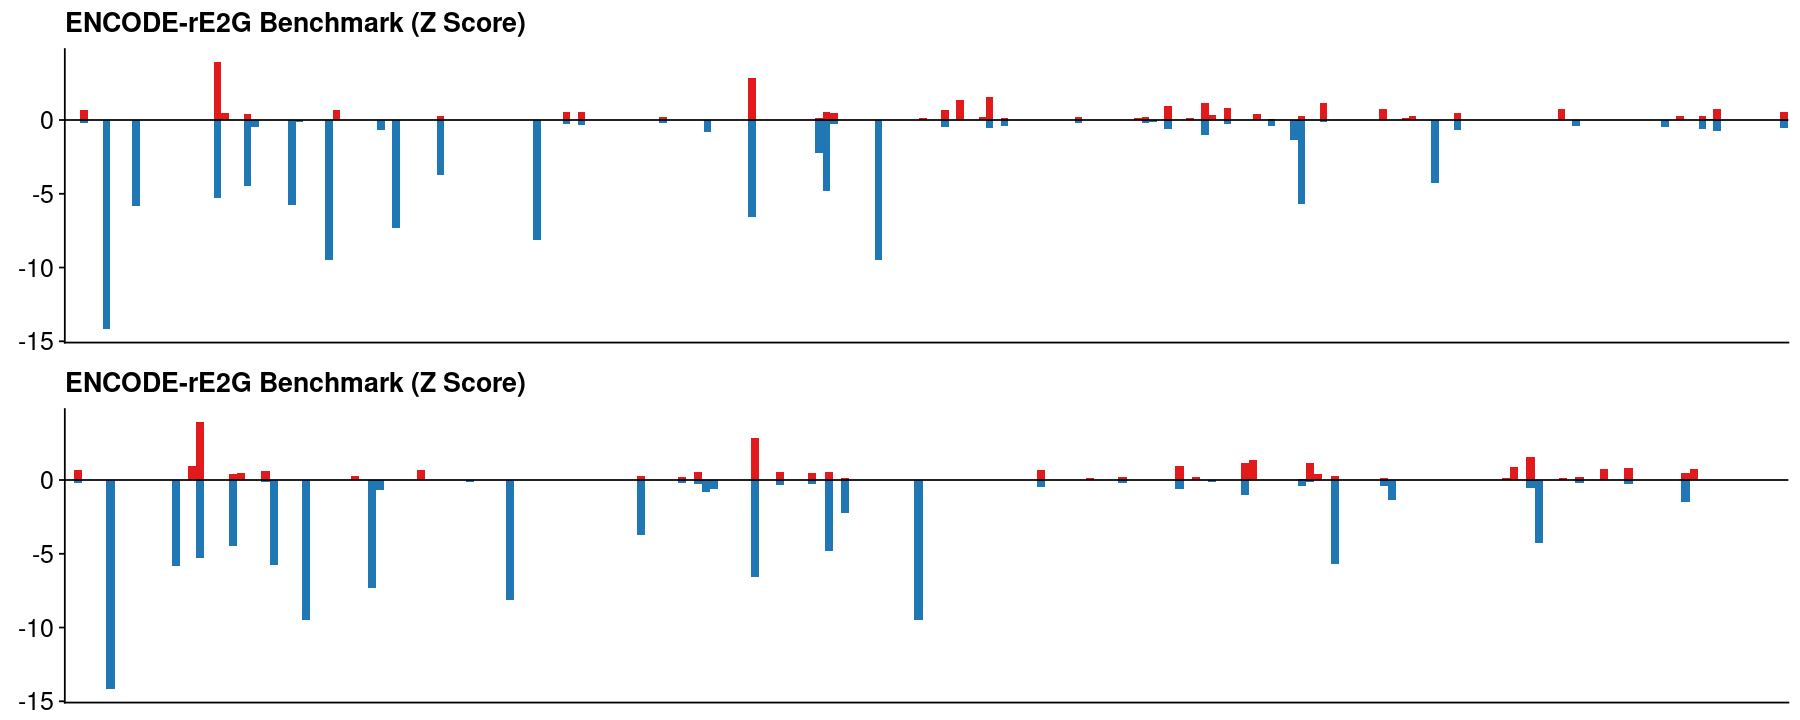

In [30]:
### set plot style
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4"
    )
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate plot
lst = lst_dat_region_score_e2g_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
        geom_col(width=1, position="identity") + 
        geom_hline(yintercept = 0) +
        labs(title = "ENCODE-rE2G Benchmark (Z Score)") +
        theme_cowplot() + 
        theme_text +
        theme_fill +
        theme_legend #+
        #scale_y_continuous(breaks = c(, -10, -5 , -2, 0, 2, 4))
})

### assign and show
lst_gpt_region_score_e2g = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Prepare ATAC

In [31]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score = lst_dat_region_score_atac_import[[txt_folder]]
    dat_region       = lst_dat_region[[txt_folder]]
    
    ### get score column
    dat = dat_region_score %>% 
        dplyr::select(Region, Score) %>%
        dplyr::right_join(dat_region, by = "Region")

    ### arrange the table
    dat = dat %>% 
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_atac_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 232   5

$fcc_astarr_macs_input_union
[1] 211   5



Region,Score,Chrom,ChromStart,ChromEnd
<fct>,<dbl>,<chr>,<dbl>,<dbl>
chr11:4554256-4554817,2.446208,chr11,4554256,4554817
chr11:4607720-4608631,39.660041,chr11,4607720,4608631
chr11:4619533-4619914,4.323324,chr11,4619533,4619914


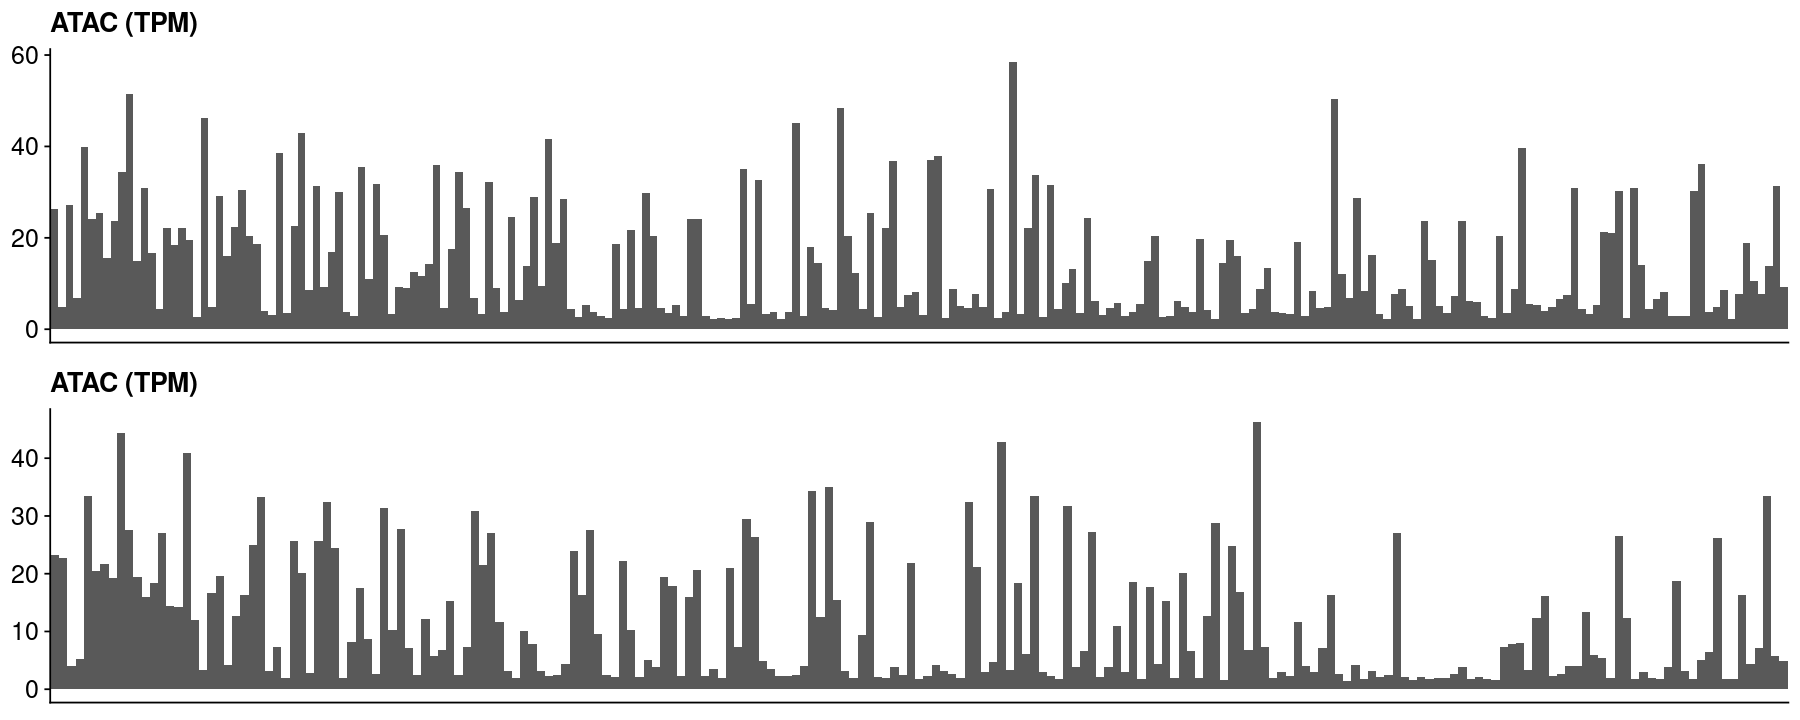

In [32]:
### set plot style
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate plot
lst = lst_dat_region_score_atac_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score)) + 
        geom_col(width=1, position="identity") +
        labs(title = "ATAC (TPM)") +
        theme_cowplot() + 
        theme_text +
        theme_legend
    return(gpt)    
})

### assign and show
lst_gpt_region_score_atac = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Combine all assays

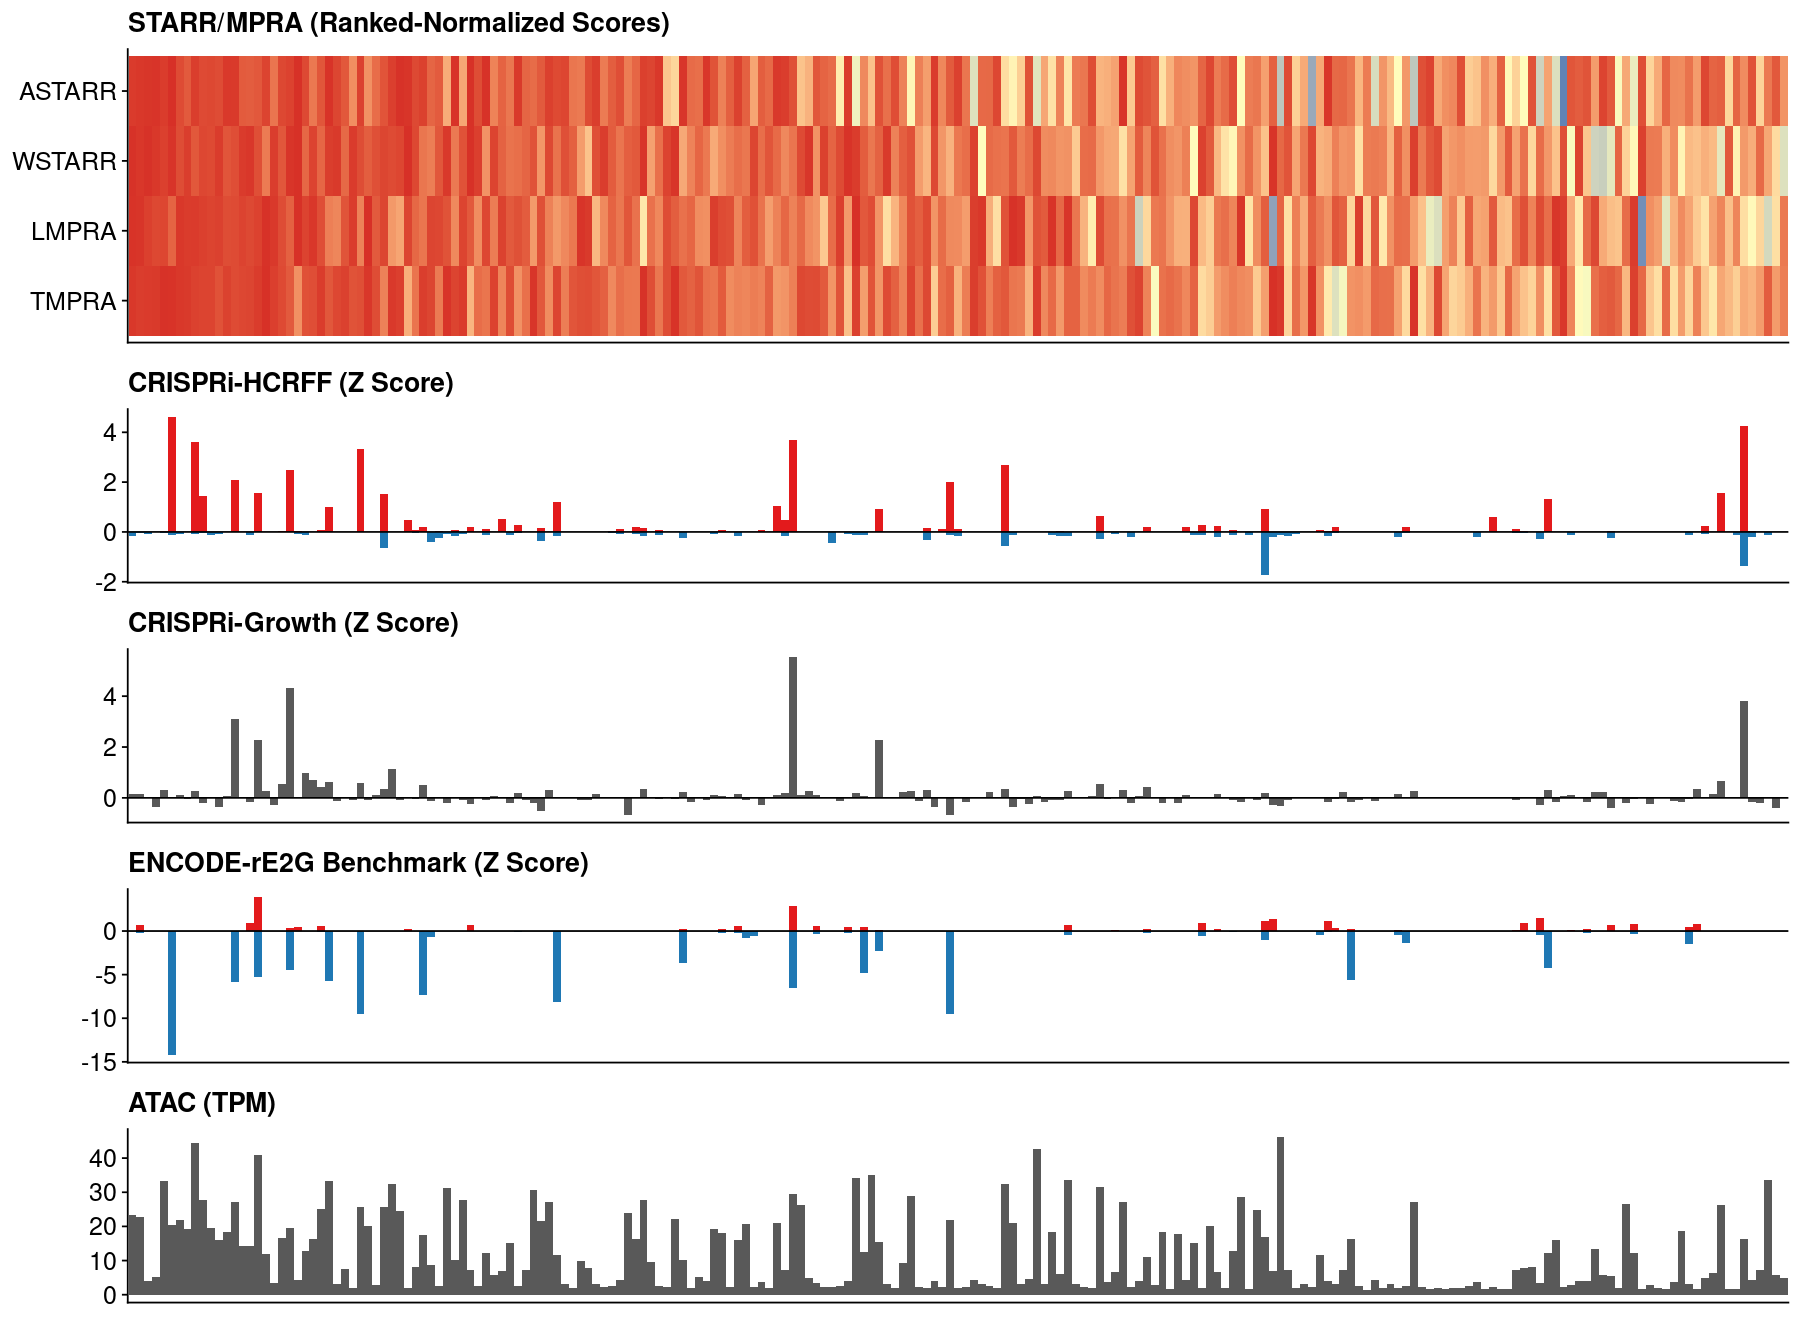

In [39]:
### combine plots
idx = "fcc_astarr_macs_input_union"
lst = list(
    lst_gpt_region_score_starrmpra[[idx]],
    lst_gpt_region_score_chcrff[[idx]],
    lst_gpt_region_score_cgrowth[[idx]],
    lst_gpt_region_score_e2g[[idx]],
    lst_gpt_region_score_atac[[idx]]
)

### generate plot
vec = c(1.5, 1, 1, 1, 1)
plt = plot_grid(
    plotlist = lst, 
    rel_heights = vec,
    ncol = 1,
    align = "v"
)

### assign and show
plt_region_score_combine = plt
options(repr.plot.height=sum(vec)*2, repr.plot.width=15)
print(plt)

## Label regions

**Arrange table**

In [40]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get regions
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get table and arrange
    dat = lst_dat_region_annot_cres_import[[txt_folder]]
    dat = dat %>% 
        dplyr::filter(Region %in% vec_txt_region) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        dplyr::arrange(Region)
    return(dat)
})

### assign and show
lst_dat_region_annot_cres_arrange = lst

res = lapply(lst, dim)
print(res)

vec = lst[[1]]
head(vec, 3)

$fcc_astarr_macs_input_overlap
[1] 17 12

$fcc_astarr_macs_input_union
[1] 17 12



Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5280584,5281266,chr11:5280584-5281266,chr11:5280585-5281266,genome_cres,LCR HS2,enhancer,HBE1,locus control region HS2,NA,known CREs
chr8,127959691,127960934,chr8:127959691-127960934,chr8:127959692-127960934,genome_cres,MYC E2,enhancer,MYC,intragenic enhancer within PVT1,"Fulco et al., 2016; Reilly et al., 2021",known CREs
chrX,48800389,48802800,chrX:48800389-48802800,chrX:48801698-48802997,genome_cres,HDAC6 promoter/enhancer,"promoter,enhancer",HDAC6,HDAC6 promoter and enhancer,"Fulco et al., 2016; Reilly et al., 2021",known CREs


**Label the regions at ATAC**

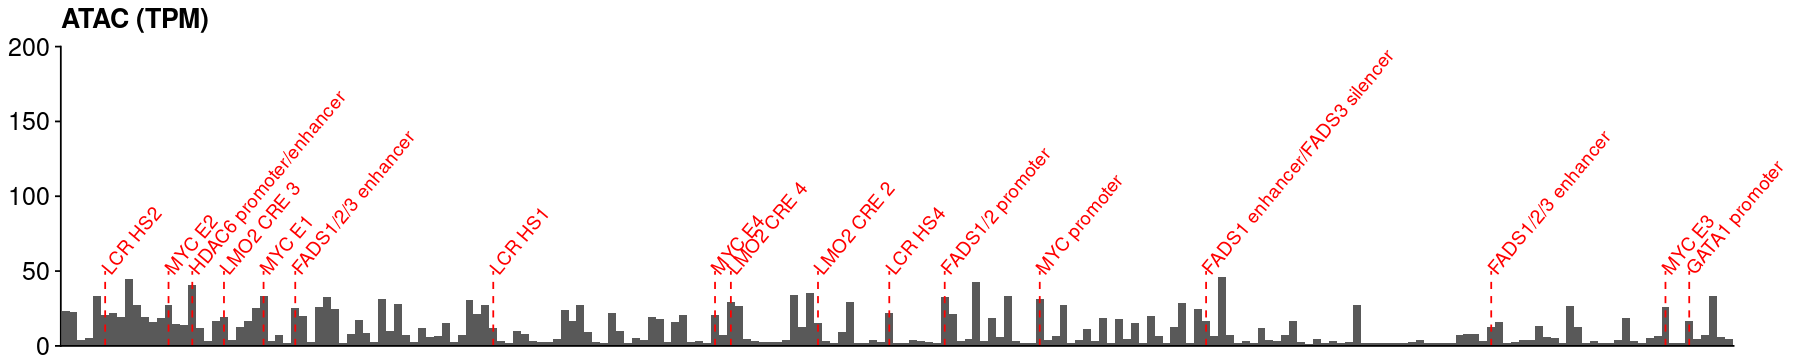

In [41]:
### get the labeled regions and plot
idx = "fcc_astarr_macs_input_union"

lst = lst_gpt_region_score_atac
gpt = lst[[idx]]

lst = lst_dat_region_annot_cres_arrange
dat = lst[[idx]]

### update the plot with labeled regions
gpt = gpt + 
    geom_segment(
        aes(x    = Region, 
            xend = Region, 
            y    = 0,          
            yend = 50
        ),         
        data      = dat,
        colour    = "red",
        linewidth = 0.5,
        linetype  = "dashed",
        inherit.aes = FALSE,
    ) +
    annotate(
        "text",
        x      = dat$Region,
        y      = 50,        # just above the tallest bar
        label  = dat$Label,
        angle  = 50,        # rotate text
        vjust  = 0.5,       # 0 = bottom, 1 = top of text
        hjust  = 0,         # adjust left/right if needed
        size   = 4,
        colour = "red"
    ) +
    # extend the y‐axis so there is room for the label
    scale_y_continuous(expand = expansion(mult = c(0, 3)))

### allow label to exceed the margine
gpt = gpt +
    coord_cartesian(clip = "off") +
    theme(plot.margin = margin(t = 5, r = 40, b = 5, l = 5, unit = "pt"))

### assign and show
gpt_region_score_atac = gpt
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

**Set verticle lines**

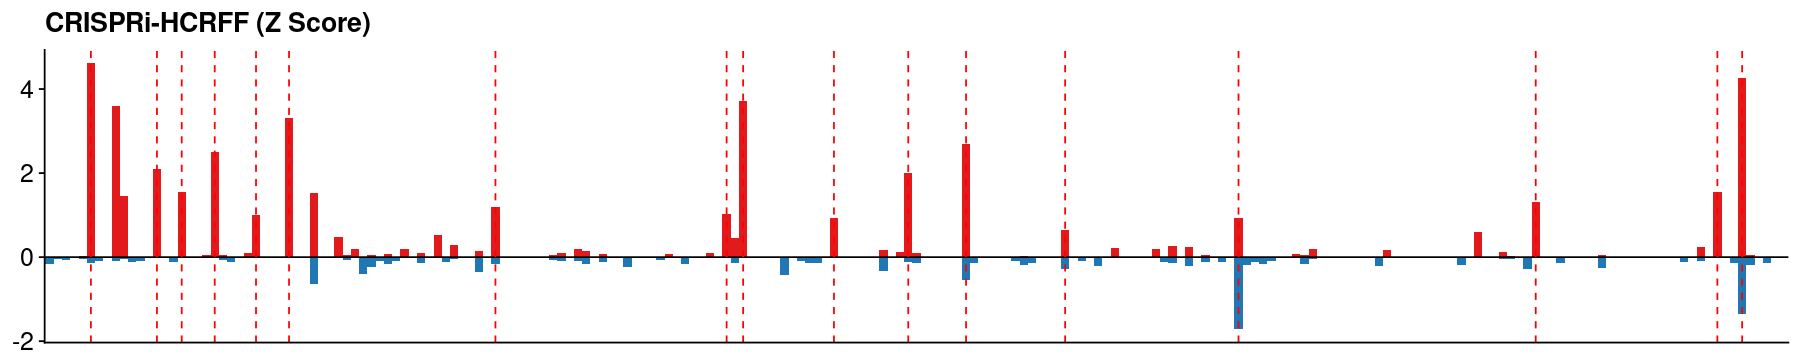

In [42]:
### get the labeled regions and plot
idx = "fcc_astarr_macs_input_union"

lst = lst_gpt_region_score_chcrff
gpt = lst[[idx]]

lst = lst_dat_region_annot_cres_arrange
dat = lst[[idx]]

### update the plot with labled regions
gpt = gpt + 
    geom_vline(
        xintercept = dat$Region,
        colour     = "red",
        linewidth  = 0.5,
        linetype   = "dashed"
    ) 

### show the plot
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [43]:
### get teh labeled regions
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_annot_cres_arrange
dat = lst[[idx]]

### setup the line theme
gpt_add_line = geom_vline(
    xintercept = dat$Region,
    colour     = "red",
    linewidth  = 0.5,
    linetype   = "dashed"
) 

**Generate the combine figure**

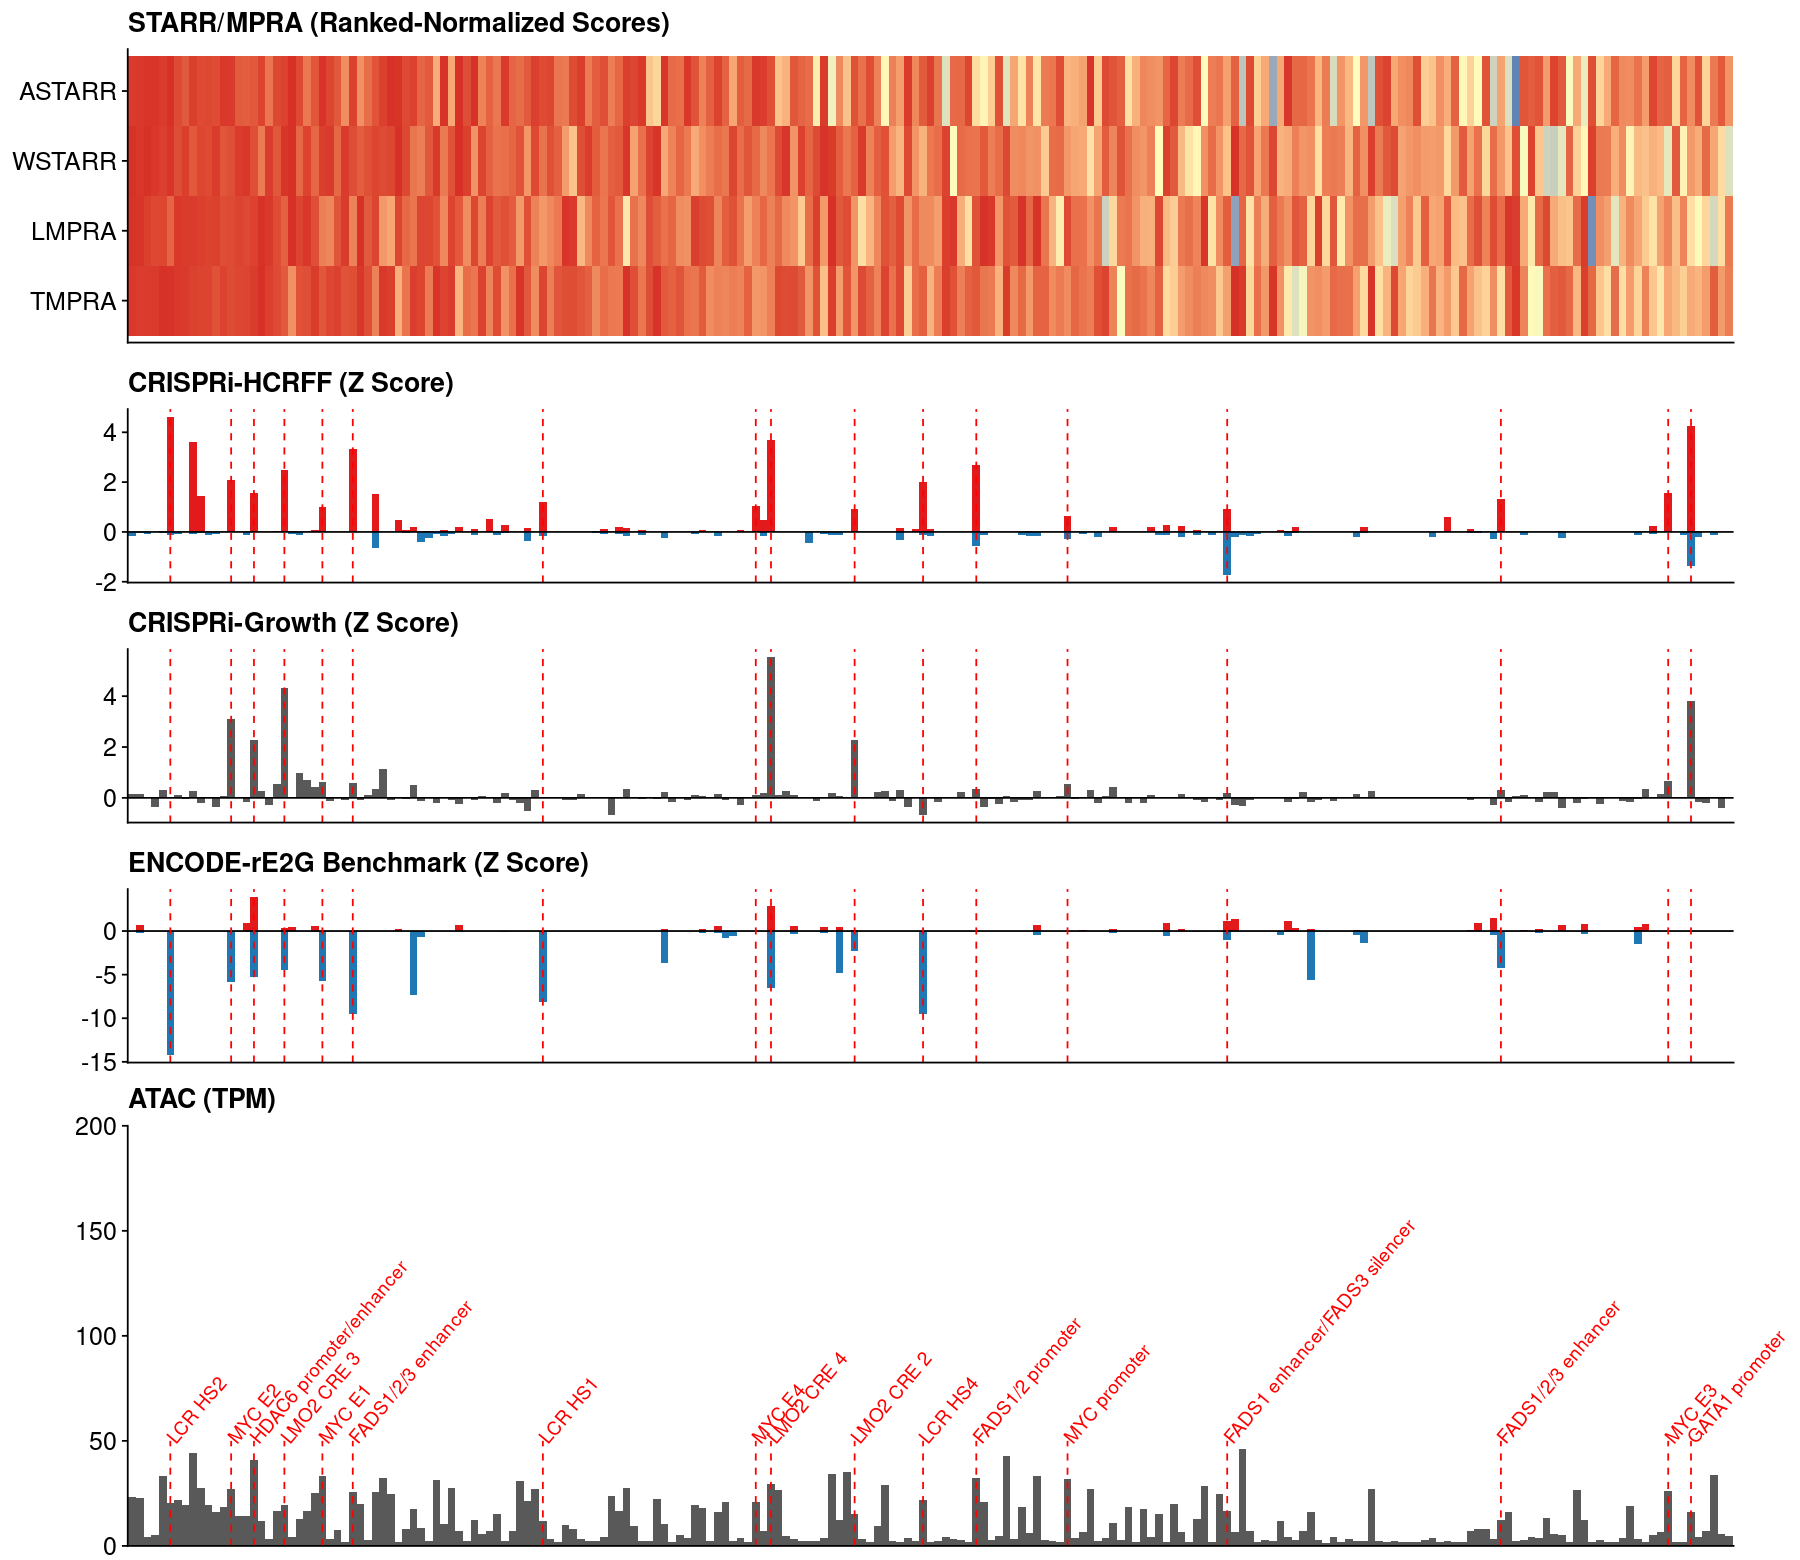

In [44]:
### combine plots
idx = "fcc_astarr_macs_input_union"
lst = list(
    lst_gpt_region_score_starrmpra[[idx]],
    lst_gpt_region_score_chcrff[[idx]]  + gpt_add_line,
    lst_gpt_region_score_cgrowth[[idx]] + gpt_add_line,
    lst_gpt_region_score_e2g[[idx]]     + gpt_add_line,
    gpt_region_score_atac               #+ gpt_add_line
    #lst_gpt_region_score_atac[[idx]]
)

### generate plot
vec = c(1.5, 1, 1, 1, 2)
plt = plot_grid(
    plotlist = lst, 
    rel_heights = vec,
    ncol = 1,
    align = "v"
)

### assign and show
plt_region_score_labeled = plt
options(repr.plot.height=sum(vec)*2, repr.plot.width=15)
print(plt)

## Save plot

In [ ]:
plt_export = gpt_export_ranknorm_line
txt_export = "fig.region_coverage_fcc.ranknorm.overlap.starrmpra"
txt_export = "fig.region_coverage_fcc.zoom_top.starrmpra_score.crispri.encode_e2g_benchmark.atac"
txt_export = "fig.region_coverage_fcc.zoom_top.starrmpra_score.crispri.encode_e2g_benchmark.atac.genome_cres"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = 5, width = 15, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = 5, width = 15, units = "in")